# Libraries

In [17]:
import pandas as pd
import numpy as np
import fasttext
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
model_path = "../data/bin/lid.176.bin" 

# Loading

In [9]:
#Version pierre temporaire
ba_reviews_experts = pd.read_parquet('../generated/ba_reviews_experts.parquet').head(100)
rb_reviews_experts = pd.read_parquet('../generated/rb_reviews_experts.parquet').head(100)
model = fasttext.load_model(model_path)

In [3]:
ba_reviews_experts = pd.read_parquet('../generated/ba_reviews_experts.parquet')
rb_reviews_experts = pd.read_parquet('../generated/rb_reviews_experts.parquet')
model = fasttext.load_model(model_path)

# Langage Detection

In [4]:
def detect_language_fasttext(text): #utils
    ''' 
    This function detects the language of a given text using a pre-trained FastText model.
    '''
    try:
        if pd.isnull(text) or text.strip() == "":
            return "unknown"
        prediction = model.predict(text.strip())
        return prediction[0][0].replace("__label__", "") 
    except Exception as e:
        return "unknown"

## BeerAdvocate

In [5]:
ba_reviews_experts['language'] = ba_reviews_experts['text'].apply(detect_language_fasttext)

In [6]:
ba_languages = ba_reviews_experts.groupby('language').agg(num_languages =('language', 'count'))
ba_total_language = ba_languages['num_languages'].sum()
ba_languages['review_proportion_percentage'] = (ba_languages['num_languages'] / ba_total_language * 100).round(5)
ba_languages = ba_languages.sort_values(by= 'num_languages', ascending= False)

In [7]:
ba_languages

,num_languages,review_proportion_percentage
language,,
en,1250674,99.98993
fr,122,0.00975
de,3,0.00024
it,1,0.00008


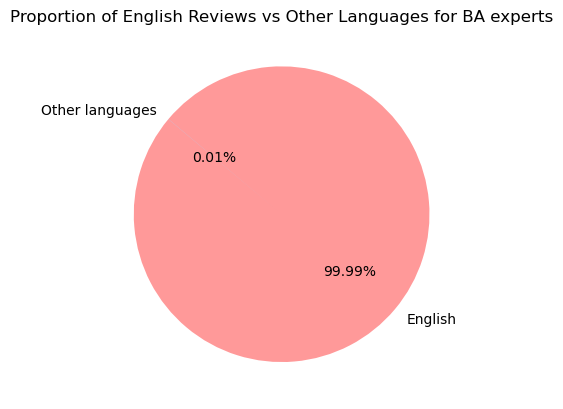

In [8]:
ba_english_reviews = ba_languages.loc['en', 'num_languages'] if 'en' in ba_languages.index else 0
ba_other_reviews = ba_total_language - ba_english_reviews
pie_data = {'English': ba_english_reviews, 'Other languages': ba_other_reviews}

plt.figure()
plt.pie(
    pie_data.values(), 
    labels=pie_data.keys(), 
    autopct='%1.2f%%', 
    startangle=140, 
    colors=['#ff9999', '#66b3ff']
)
plt.title("Proportion of English Reviews vs Other Languages for BA experts")
plt.show()


**Comment:** The vast majority of BeerAdvocate users speak English. A very small proportion speak Germanv(de), French(fr) or Italian(it). Given the similar result for RateBeer (see RateBeer section), we have decided to remove users whose reviews are not in English from our study.

### Saving

In [9]:
ba_reviews_experts_en = ba_reviews_experts[ba_reviews_experts['language'] == 'en'].copy()
ba_reviews_experts_en.to_parquet('../generated/ba_reviews_experts_en.parquet')

# RateBeer

In [10]:
rb_reviews_experts['language'] = rb_reviews_experts['text'].apply(detect_language_fasttext)

In [11]:
rb_languages = rb_reviews_experts.groupby('language').agg(num_languages =('language', 'count'))
rb_total_language = rb_languages['num_languages'].sum()
rb_languages['review_proportion_percentage'] = (rb_languages['num_languages'] / rb_total_language * 100).round(5)
rb_languages = rb_languages.sort_values(by= 'num_languages', ascending= False)

In [12]:
rb_languages

,num_languages,review_proportion_percentage
language,,
en,3412968,95.87487
de,44389,1.24695
fr,36989,1.03907
no,18628,0.52329
sv,11912,0.33462
pl,8238,0.23142
it,8084,0.22709
nl,6990,0.19636
es,6909,0.19408


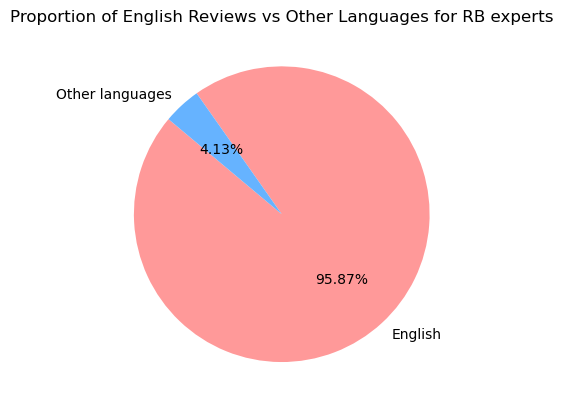

In [13]:
rb_english_reviews = rb_languages.loc['en', 'num_languages'] if 'en' in rb_languages.index else 0
rb_other_reviews = rb_total_language - rb_english_reviews
pie_data = {'English': rb_english_reviews, 'Other languages': rb_other_reviews}

plt.figure()
plt.pie(
    pie_data.values(), 
    labels=pie_data.keys(), 
    autopct='%1.2f%%', 
    startangle=140, 
    colors=['#ff9999', '#66b3ff']
)
plt.title("Proportion of English Reviews vs Other Languages for RB experts")
plt.show()

**Comment:** The vast majority of RateBeer users speak English, but although the proportion of users using a language other than English is low (<5%), from an accounting point of view this still represents a significant number of users (almost 1.5 million) who speak other languages such as German (de), French (fr), Norwegian (no) and Swedish (sv).

Although the number of non-English reviews here is greater, we have decided to keep only the English reviews, which represent more than 95% of our data for RateBeer.

### Saving

In [14]:
rb_reviews_experts_en = rb_reviews_experts[rb_reviews_experts['language'] == 'en'].copy()
rb_reviews_experts_en.to_parquet('../generated/rb_reviews_experts_en.parquet')